<a href="https://colab.research.google.com/github/DSjeongmin/Kaggle/blob/main/%5Bkaggle%5D%5BNew_York_Taxi_Duration%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA & FE

Features
* id -	각 여행에 대한 식별자
* vendor_id	- 여행 기록과 관련된 제공자를 나타내는 코드
* pickup_datetime -	미터가 작동 된 날짜 및 시간
* dropoff_datetime -	미터가 작동되지 않는 날짜 및 시간
* passenger_count -	차량의 승객 수 (운전자 입력 값)
* pickup_longitude -	미터가 사용 된 경도
* pickup_latitude -	미터가 사용 된 위도
* dropoff_longitude -	미터가 사용 안 된 경도
* dropoff_latitude -	미터가 사용 안 된 위도
* store_and_fwd_flag -	이 플래그는 차량이 서버에 연결되어 있지 않기 때문에 공급 업체에 보내기 전에 여행 레코드가 차량 메모리에 보유되었는지 여부를 나타냅니다 (Y = 저장 및 전달, N = 저장 및 전달 여행이 아님).
* trip_duration -	여행 시간 (초)

In [ ]:
import numpy as np
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

train = pd.read_csv("/content/drive/MyDrive/Kaggle/nyc-taxi-trip-duration/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Kaggle/nyc-taxi-trip-duration/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Kaggle/nyc-taxi-trip-duration/sample_submission.csv")

In [ ]:
train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [ ]:
test.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [ ]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

* 타겟변수 확인

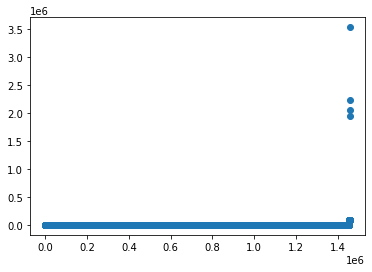

In [ ]:
from scipy import stats

plt.scatter(range(train.shape[0]),np.sort(train['trip_duration']))

# 산점도 결과 이상치 존재하지 않음.

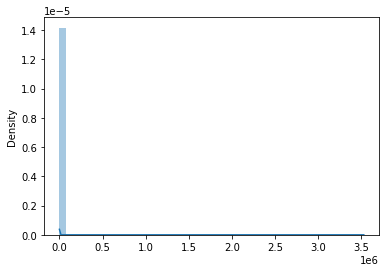

In [ ]:
sns.distplot(train.trip_duration.values, kde=True)

# 정규성을 띄지 않으므로 정규화가 필요하다고 판단.

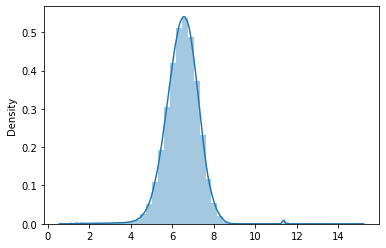

In [ ]:
sns.distplot(np.log1p(train.trip_duration.values), kde=True)

# 정규화 후 정규성을 띄는 결과 파악 됨.

In [ ]:
# 타겟변수 로그 변환
train['trip_duration'] = np.log(train['trip_duration'].values)

* 데이터 합치기

In [ ]:
# 데이터 전처리의 편의를 위해 데이터 합침
feature_names=list(test)
df_train=train[feature_names]
df=pd.concat((df_train, test))

train.shape, test.shape, df.shape

((1458644, 11), (625134, 9), (2083778, 9))

In [ ]:
df.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N


* 날짜 변수

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek

df.drop(['pickup_datetime'], axis=1, inplace=True)

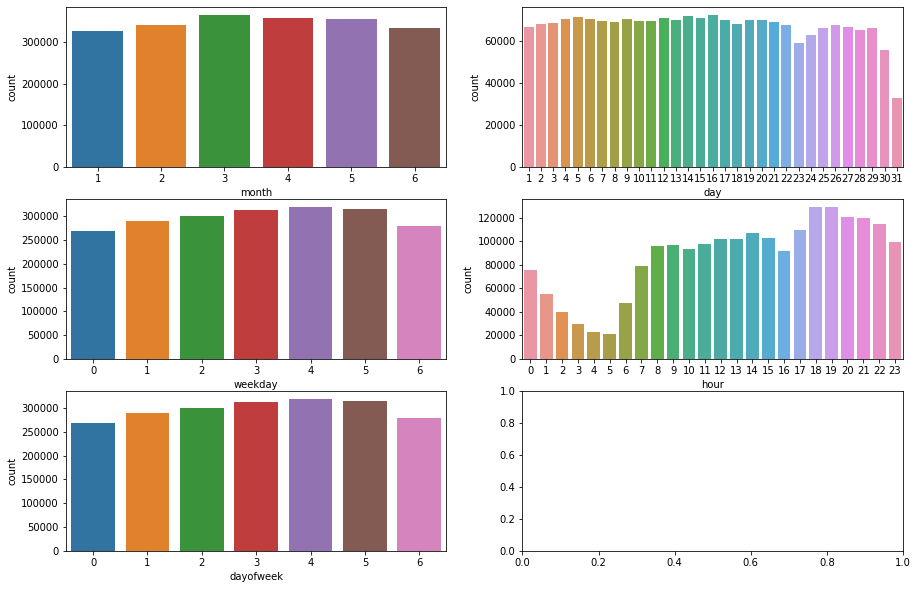

In [ ]:
figure, axs = plt.subplots(3,2,figsize=(15,10))

sns.countplot(data=df, x='month', ax=axs[0][0])
sns.countplot(data=df, x='day',  ax=axs[0][1])
sns.countplot(data=df, x='weekday',  ax=axs[1][0])
sns.countplot(data=df, x='hour', ax=axs[1][1])
sns.countplot(data=df, x='dayofweek',  ax=axs[2][0])

# 픽업이 새벽에는 매우 낮고 6시~8시 사이에 제일 높은것을 알 수 있다
# 픽업이 월요일에 제일 낮은것을 볼 수 있다.

* 거리변수

In [ ]:
df['dist_long'] = df['pickup_longitude'] - df['dropoff_longitude']
df['dist_lat'] = df['pickup_latitude'] - df['dropoff_latitude']

In [ ]:
# 미터기가 시작되고 끝난 각각의 경도 위도만큼 빼준다음에 총 합계를 구해서 
# 새로운 파생변수를 만들었다

df['dist'] = np.sqrt(np.square(df['dist_long']) + np.square(df['dist_lat']))

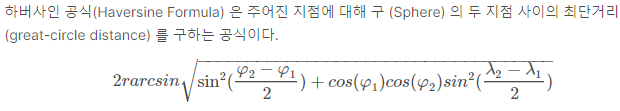

In [ ]:
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# 두 위도와 경도 사이의 거리를 구하는 공식으로 하버사인 공식을 사용해서 거리 피처를 구해줍니다.
df['distance'] = ft_haversine_distance(df['pickup_latitude'].values,
                                       df['pickup_longitude'].values, 
                                       df['dropoff_latitude'].values,
                                       df['dropoff_longitude'].values)

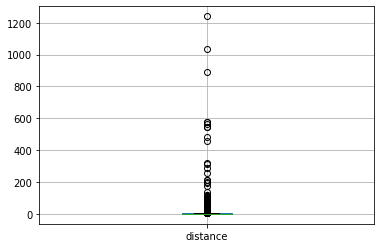

In [ ]:
# 이상치가 존재하지만 대체를 하지 않음
#(거리상 멀다고 나온 수치로 의미있는 수치라고 판단하고 분석)
df.boxplot(column='distance')

In [ ]:
df['distance'].describe()

count    2.083778e+06
mean     3.438628e+00
std      4.289263e+00
min      0.000000e+00
25%      1.231865e+00
50%      2.093730e+00
75%      3.877528e+00
max      1.240909e+03
Name: distance, dtype: float64

In [ ]:
df[df['distance']>800]

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,day,weekday,hour,dayofweek,dist_long,dist_lat,dist,distance
184925,id2306955,1,1,-72.809669,51.881084,-73.987228,40.750599,N,5,7,5,18,5,1.177559,11.130486,11.192603,1240.908677
974378,id1510552,2,5,-71.799896,35.081532,-79.352837,40.436329,N,1,6,2,20,2,7.552940,-5.354797,9.258551,891.214103
512346,id2776665,1,1,-73.981995,40.746468,-67.496796,48.857597,N,2,5,4,15,4,-6.485199,-8.111130,10.385000,1036.043469


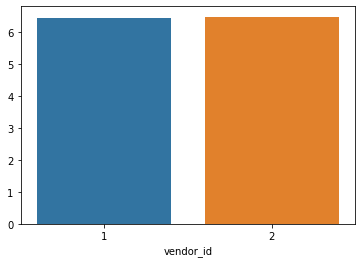

In [ ]:
g_vendor = train.groupby('vendor_id')['trip_duration'].mean()
sns.barplot(g_vendor.index,g_vendor.values)

# 공급업체 별로 그룹바이를 한 상태에서 타겟변수를 확인해본 결과 별 차이는 없는것같다

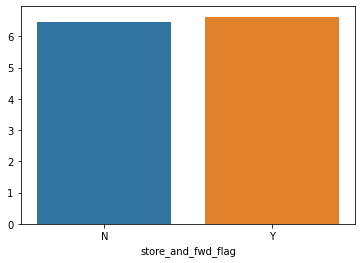

In [ ]:
sfflag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()
sns.barplot(sfflag.index,sfflag.values)

# 'store_and_fwd_flag'는 여행 시간을 잘 구별하는 것처럼 보인다

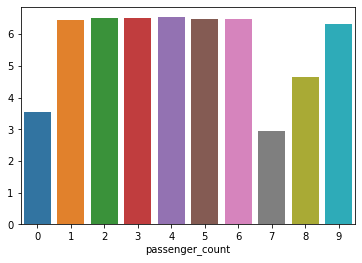

In [ ]:
pc = train.groupby('passenger_count')['trip_duration'].mean()
sns.barplot(pc.index,pc.values)

* 범주형 변수 원핫 인코딩

In [ ]:
df = pd.concat([df, pd.get_dummies(df['store_and_fwd_flag'],prefix = 'store')], axis=1)
df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['vendor_id'],prefix = 'vendor')], axis=1)
df.drop(['vendor_id'], axis=1, inplace=True)

In [ ]:
df.head(3)

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,month,day,weekday,hour,dayofweek,dist_long,dist_lat,dist,distance,store_N,store_Y,vendor_1,vendor_2
0,id2875421,1,-73.982155,40.767937,-73.964630,40.765602,3,14,0,17,0,-0.017525,0.002335,0.017680,1.498521,1,0,0,1
1,id2377394,1,-73.980415,40.738564,-73.999481,40.731152,6,12,6,0,6,0.019066,0.007412,0.020456,1.805507,1,0,1,0
2,id3858529,1,-73.979027,40.763939,-74.005333,40.710087,1,19,1,11,1,0.026306,0.053852,0.059934,6.385098,1,0,0,1


* 상관 관계

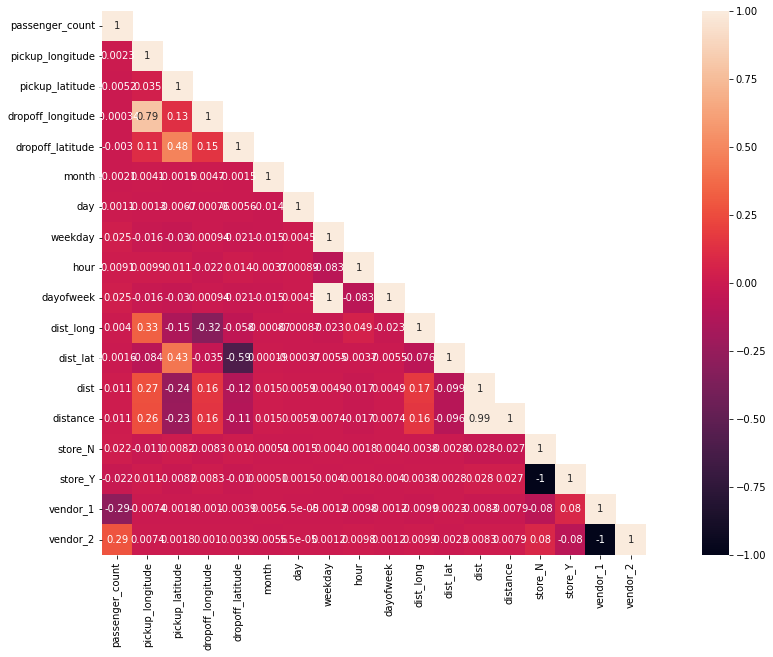

In [ ]:
cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor,mask= mask,square=True,annot=True)

모델링

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
train.shape, df.shape, df.shape[0] - train.shape[0]

((1458644, 11), (2083778, 19), 625134)

In [ ]:
df.drop(["id"], axis=1, inplace=True)

new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

target = train['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(new_train, target, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1166915, 18), (291729, 18), (1166915,), (291729,))

* RMSLE

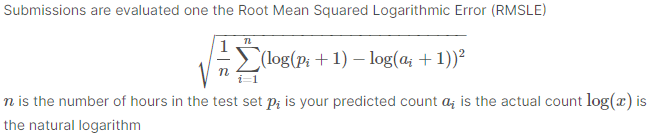

In [ ]:
def rmsle_score(preds, true):
    rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

In [ ]:
# 모델을 비교할때 평가치로 사용

from sklearn.metrics.scorer import make_scorer

RMSLE = make_scorer(rmsle_score)

* 통계 확인

In [ ]:
import statsmodels.api as sm

model = sm.OLS(target.values, new_train.astype(float))

In [ ]:
re = model.fit()
re.summary()

# 모델의 설명력이 0.338이며 각 피처의 p-value가 0.0000으로 유의수준 5%보다 낮았으며 
# 다중공선성의 문제는 없는것으로 보인다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                 5.721e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:52:13   Log-Likelihood:            -1.4430e+06
No. Observations:             1458644   AIC:                         2.886e+06
Df Residuals:                 1458630   BIC:                         2.886e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
passenger_count       0.0074      0.000     17.165      0.000       0.007       0.008
pickup_longitude     -0.4393      0.006    -74.171      0.000      -0.451      -0.428
pickup_latitude      -0.4808      0.011    -42.122      0.000      -0.503      -0.458
dropoff_longitude     0.2161      0.006     38.047      0.000       0.205       0.227
dropoff_latitude     -0.6385      0.010    -62.006      0.000      -0.659      -0.618
month                 0.0178      0.000     55.435      0.000       0.017       0.018
day                   0.0007   6.19e-05     10.729      0.000       0.001       0.001
weekday              -0.0063      0.000    -45.347      0.000      -0.007      -0.006
hour                  0.0061   8.46e-05     72.132      0.000       0.006       0.006
dayofweek            -0.0063      0.000    -45.347      0.000      -0.007      -0.006
dist_long            -0.6554      0.008    -82.045      0.000      -0.671      -0.640
dist_lat              0.1578      0.011     14.995      0.000       0.137       0.178
dist                 -0.9781      0.110     -8.894      0.000      -1.194      -0.763
distance              0.1182      0.001    101.227      0.000       0.116       0.120
store_N              17.5265      0.536     32.709      0.000      16.476      18.577
store_Y              17.5372      0.536     32.730      0.000      16.487      18.587
vendor_1             17.5219      0.536     32.701      0.000      16.472      18.572
vendor_2             17.5418      0.536     32.738      0.000      16.492      18.592
==============================================================================
Omnibus:                  2500235.096   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     153025119387.090
Skew:                         -10.420   Prob(JB):                         0.00
Kurtosis:                    1589.627   Cond. No.                     6.01e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.96e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* lightgbm

In [ ]:
import lightgbm as lgbm

lgb_params = {
    'metric' : 'rmse',
    'learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000, 
    'objective': 'regression',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.5,
    'max_bin': 1000 }

lgb_df = lgbm.Dataset(new_train,target)

In [ ]:
lgb_model = lgbm.train(lgb_params, lgb_df, num_boost_round=1500)

pred = lgb_model.predict(new_test)

pred_lgb = np.exp(pred)

* XGboost

In [ ]:
import xgboost as xgb

params = {
    'booster':            'gbtree',
    'objective':          'reg:linear',
    'learning_rate':      0.1,
    'max_depth':          14,
    'subsample':          0.8,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1
}

dtrain = xgb.DMatrix(new_train, target)

In [ ]:
gbm = xgb.train(params,
                dtrain,
                num_boost_round = 200)

pred_test = np.exp(gbm.predict(xgb.DMatrix(new_test)))

예측

* 앙상블

In [ ]:
ensemble_8_2 = (0.8*pred_lgb + 0.4*pred_test)     
ensemble_7_3 = (0.7*pred_lgb + 0.3*pred_test)     
ensemble_6_4 = (0.6*pred_lgb + 0.4*pred_test)     
ensemble_55_45 = (0.55*pred_lgb + 0.45*pred_test) 

In [ ]:
# 평가기준 rmsle 가장 낮은 앙상블 모델 사용

sub = pd.DataFrame()
sub['id'] = test.id
sub['trip_duration'] = ensemble_6_4
sub.head(3)

,id,trip_duration
0,id3004672,761.704553
1,id3505355,552.196600
2,id1217141,442.543069
